In [158]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
np.random.seed(100)

tickers = ['APD','AMD','AEZS','AA','ADI','A','CF', 'AAPL','TSLA','NVDA']

data = yf.download(tickers, period='1y', auto_adjust=True)['Close'][tickers] #!!!! yf download default at alphabetical order
returns = (data/data.shift(1)-1).dropna()

mu = returns.mean()
Sigma = returns.cov()
T = len(returns)

def MVO_Robust(mu_hat, Sigma_hat, kappa, delta, lmd = 1):
    N = len(mu_hat)
    S12 = np.linalg.cholesky(Sigma_hat)  # S12 such that S12^T @ S12 = Sigma
    w = cp.Variable(N)
    objective = cp.Maximize(w @ mu_hat - kappa * cp.pnorm(S12 @ w , 2)
                            - lmd/2 * ((cp.pnorm(S12 @ w, 2) + delta * cp.pnorm(w, 2))**2))
    constraints = [w >= 0, cp.sum(w) == 1]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    return w.value

    
# Set parameters
kappa = 1.0
delta = 0.1 * np.sqrt(T)
w_all_Markowitz_robust = []  # List to store portfolio allocations

# Number of iterations
for i in range(10):
    X_noisy = np.random.multivariate_normal(mu, Sigma, size=T)
    mu_noisy = np.mean(X_noisy, axis = 0)
    Sigma_noisy = np.cov(X_noisy, rowvar = False)
    
    w_Markowitz_robust_noisy = MVO_Robust(mu_noisy, Sigma_noisy, kappa, delta/np.sqrt(T - 1))
    w_all_Markowitz_robust.append(w_Markowitz_robust_noisy)

# Convert the list of portfolio allocations to a numpy array
w_all_Markowitz_robust = np.array(w_all_Markowitz_robust)
w_all_Markowitz_robust

[*********************100%***********************]  10 of 10 completed


array([[7.06859716e-09, 1.11873500e-09, 2.97713534e-02, 5.66912389e-02,
        7.55135234e-02, 2.90558102e-01, 1.34498672e-01, 1.24676657e-01,
        5.81241963e-02, 2.30166248e-01],
       [7.49169058e-10, 2.51963347e-10, 2.67147720e-02, 2.48246382e-02,
        1.50993535e-01, 2.33569685e-01, 1.44301307e-01, 2.02117027e-01,
        8.47312850e-10, 2.17479034e-01],
       [1.04453892e-09, 6.03314567e-10, 3.45837314e-02, 1.98311552e-02,
        9.63970649e-02, 2.13511543e-01, 1.39825929e-01, 1.29402042e-01,
        3.14657239e-02, 3.34982808e-01],
       [7.94434092e-10, 7.73665130e-10, 1.73192150e-02, 9.24063605e-02,
        1.91666458e-01, 2.15655654e-01, 1.04767522e-01, 1.72399553e-01,
        3.43798565e-03, 2.02347251e-01],
       [3.81813380e-10, 2.58383893e-10, 9.77751477e-03, 6.08578040e-02,
        5.15471363e-02, 2.67919853e-01, 1.85865439e-01, 2.06632930e-01,
        5.30780658e-09, 2.17399317e-01],
       [3.29389643e-10, 2.12007986e-10, 1.30379228e-02, 4.61400869e-02,
   

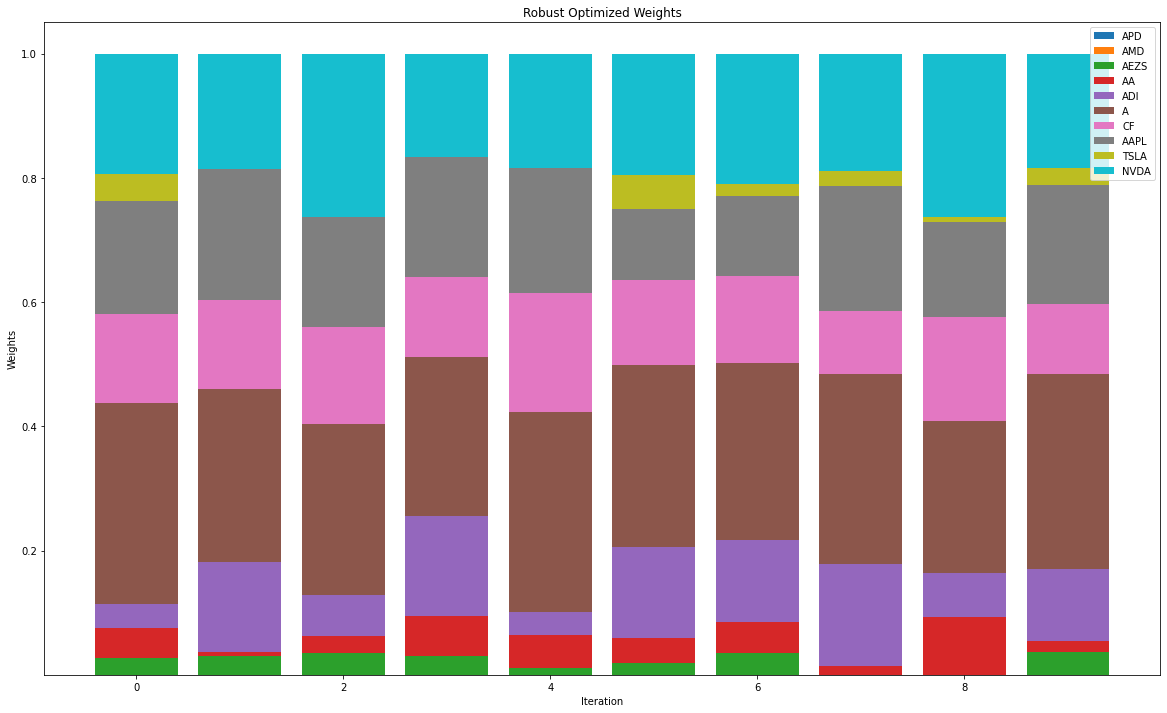

In [157]:
# Create x-axis values (iterations)
w_all_Markowitz_robust = w_all_Markowitz_robust.T
iterations = np.arange(len(w_all_Markowitz_robust[0]))

# Create a stacked bar plot
plt.figure(figsize=(20, 12))  # Adjust the figure size as needed
bottom = np.zeros(len(w_all_Markowitz_robust[0]))

for i, asset_weights in enumerate(w_all_Markowitz_robust):
    plt.bar(iterations, asset_weights, label= tickers[i], bottom=bottom)
    bottom += asset_weights

# Add labels and legend
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.title('Robust Optimized Weights')
plt.legend()

# Show the plot
plt.show()